In [79]:
import time
import pymysql
import pandas as pd
from datetime import datetime, timedelta
%matplotlib inline

In [80]:
conn = pymysql.connect(host='211.226.15.58', port=8282, user='root', password='iloveicns', db='smart-plant-dashboard', charset='utf8')
cur = conn.cursor()

In [15]:
sensor_data = pd.read_sql("select * from sensor_data", conn)
sensor_data

,data_id,created_at,input_data,ss_id
0,65359,2022-04-30 23:55:49,27.4,3
1,65360,2022-04-30 23:55:49,26.6,4
2,65361,2022-04-30 23:55:49,10.0,5
3,65362,2022-04-30 23:55:49,10.0,6
4,65363,2022-04-30 23:55:49,10.0,7
...,...,...,...,...
211608,277168,2022-11-29 10:56:30,5.0,5
211609,277169,2022-11-29 10:56:30,5.0,6
211610,277170,2022-11-29 10:56:30,5.0,7
211611,277171,2022-11-29 10:56:30,5.0,8


In [16]:
sensor_pos = pd.read_sql("select * from sensor_pos", conn)
sensor_pos

,pos_id,background_img_path,pos_code,pos_dtl,pos_name,position_img_path,position_path
0,1,/root/icns-smart-plant-server/Smart-Plant-Dash...,HR,원희캐슬 631호,광주A,/root/icns-smart-plant-server/Smart-Plant-Dash...,/root/icns-smart-plant-server/Smart-Plant-Dash...
1,2,/root/icns-smart-plant-server/Smart-Plant-Dash...,M,미금근처,광주B,None,None
2,4,/root/icns-smart-plant-server/Smart-Plant-Dash...,KC,,광주C,None,None
3,5,/root/icns-smart-plant-server/Smart-Plant-Dash...,KD,,광주D,None,None


In [17]:
sensor_type = pd.read_sql("select * from sensor_type", conn)
sensor_type

,type_id,display,type_code,type_color_code,type_dtl,type_name,unit
0,1,2,T,#f44336,온도센서,온도,ºC
1,2,3,H,#ff9800,습도센서,습도,%
2,3,1,D,#ffeb3b,자이로센서,자이로 X,º
3,4,1,G,#4caf50,자이로센서,자이로 Y,º
4,5,1,CC,#2196f3,이산화탄소 센서,CO2,ppm
5,6,1,C,#673ab7,일산화탄소 센서,CO,ppm
6,7,4,h1,#e91e63,PM1.0,PM1.0,ug/m^3
7,8,4,h2,#9c27b0,PM2.5,PM2.5,ug/m^3
8,16,4,h3,#3f51b5,PM4.0,PM4.0,ug/m^3
9,17,4,h4,#00bcd4,PM10,PM10,ug/m^3


In [18]:
sensor_manage = pd.read_sql("select * from sensor_manage", conn)
sensor_manage

,ss_id,rend,rlev1,rlev2,rlev3,rlev4,rstart,sensor_state,ss_contact,ss_contact_ext,ss_contact_phone,sensorpos_id,sensortype_id,range_type,rlev5,rlev6,rlev7,rlev8
0,2,20000.0,700.0,800.0,1000.0,1500.0,0.0,0.0,신영록,,,1,5,0.0,0.0,0.0,0.0,0.0
1,3,100.0,30.0,31.0,32.0,33.0,0.0,0.0,신영록,,,1,1,0.0,0.0,0.0,0.0,0.0
2,4,100.0,60.0,70.0,80.0,90.0,0.0,0.0,신영록,,,1,2,0.0,0.0,0.0,0.0,0.0
3,5,100.0,35.0,40.0,45.0,50.0,0.0,0.0,신영록,,,1,7,0.0,0.0,0.0,0.0,0.0
4,6,100.0,20.0,40.0,60.0,80.0,0.0,0.0,신영록,,,1,8,0.0,20.0,40.0,60.0,80.0
5,7,100.0,20.0,40.0,60.0,80.0,0.0,0.0,신영록,,,1,16,0.0,20.0,40.0,60.0,80.0
6,8,100.0,20.0,40.0,60.0,80.0,0.0,0.0,신영록,,,1,17,0.0,20.0,40.0,60.0,80.0
7,9,1000.0,56.0,112.0,800.0,900.0,0.0,4.0,신영록,,,1,18,0.0,20.0,40.0,60.0,80.0
8,11,100.0,20.0,40.0,60.0,80.0,0.0,2.0,허지원,01012349341,01012344569,2,2,0.0,20.0,40.0,60.0,80.0
9,16,100.0,-80.0,-60.0,-40.0,-20.0,0.0,NaN,허지원,,,1,1,NaN,20.0,40.0,60.0,80.0


In [26]:
# 이산화탄소 센서
co2_data = sensor_data.loc[sensor_data['ss_id']==2]
# 온도 센서
temp_data = sensor_data.loc[sensor_data['ss_id']==3]
# 습도 센서
humid_data = sensor_data.loc[sensor_data['ss_id']==4]
# PM1.0 센서
pm1_data = sensor_data.loc[sensor_data['ss_id']==5]
# PM2.5 센서
pm2_data = sensor_data.loc[sensor_data['ss_id']==6]
# PM4.0 센서
pm4_data = sensor_data.loc[sensor_data['ss_id']==7]
# PM10 센서
pm10_data = sensor_data.loc[sensor_data['ss_id']==8]
# TVOC 센서
tvoc_data = sensor_data.loc[sensor_data['ss_id']==9]

In [28]:
col_list = list(co2_data.columns)
col_list[2] = 'co2_data'
co2_data.columns = col_list
col_list = list(temp_data.columns)
col_list[2] = 'temp_data'
temp_data.columns = col_list
col_list = list(humid_data.columns)
col_list[2] = 'humid_data'
humid_data.columns = col_list
col_list = list(pm1_data.columns)
col_list[2] = 'pm1_data'
pm1_data.columns = col_list
col_list = list(pm2_data.columns)
col_list[2] = 'pm2_data'
pm2_data.columns = col_list
col_list = list(pm4_data.columns)
col_list[2] = 'pm4_data'
pm4_data.columns = col_list
col_list = list(pm10_data.columns)
col_list[2] = 'pm10_data'
pm10_data.columns = col_list
col_list = list(tvoc_data.columns)
col_list[2] = 'tvoc_data'
tvoc_data.columns = col_list

In [29]:
hr_sensor_data = pd.merge(left=co2_data, right=temp_data, how="inner", on="created_at")
hr_sensor_data = pd.merge(left=hr_sensor_data, right=humid_data, how="inner", on="created_at")
hr_sensor_data = pd.merge(left=hr_sensor_data, right=pm1_data, how="inner", on="created_at")
hr_sensor_data = pd.merge(left=hr_sensor_data, right=pm2_data, how="inner", on="created_at")
hr_sensor_data = pd.merge(left=hr_sensor_data, right=pm4_data, how="inner", on="created_at")
hr_sensor_data = pd.merge(left=hr_sensor_data, right=pm10_data, how="inner", on="created_at")
hr_sensor_data = pd.merge(left=hr_sensor_data, right=tvoc_data, how="inner", on="created_at")

hr_sensor_data = hr_sensor_data[["created_at","co2_data","temp_data","humid_data","pm10_data","tvoc_data"]]
hr_sensor_data = hr_sensor_data.sort_values(by=['created_at'],ascending=True)

hr_sensor_data.to_csv("hr_sensor_data.csv", index=False)

/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ss_id_x', 'data_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ss_id_x', 'data_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  """
/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ss_id_x', 'data_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  import sys


In [32]:
hr_sensor_data

,created_at,co2_data,temp_data,humid_data,pm10_data,tvoc_data
0,2022-05-01 00:05:49,390.0,27.5,26.6,10.0,780.0
1,2022-05-01 00:15:49,390.0,27.5,26.5,9.0,785.0
2,2022-05-01 00:25:49,389.0,27.6,26.5,9.0,805.0
3,2022-05-01 00:35:49,396.0,27.6,26.4,9.0,808.0
4,2022-05-01 00:45:49,390.0,27.6,26.4,9.0,793.0
...,...,...,...,...,...,...
21890,2022-11-29 10:16:30,434.0,15.2,53.0,4.0,9999.0
21891,2022-11-29 10:26:30,437.0,15.1,53.1,4.0,9999.0
21892,2022-11-29 10:36:30,436.0,15.1,53.0,4.0,9636.0
21893,2022-11-29 10:46:30,438.0,15.1,52.8,5.0,8466.0


<AxesSubplot:xlabel='created_at'>

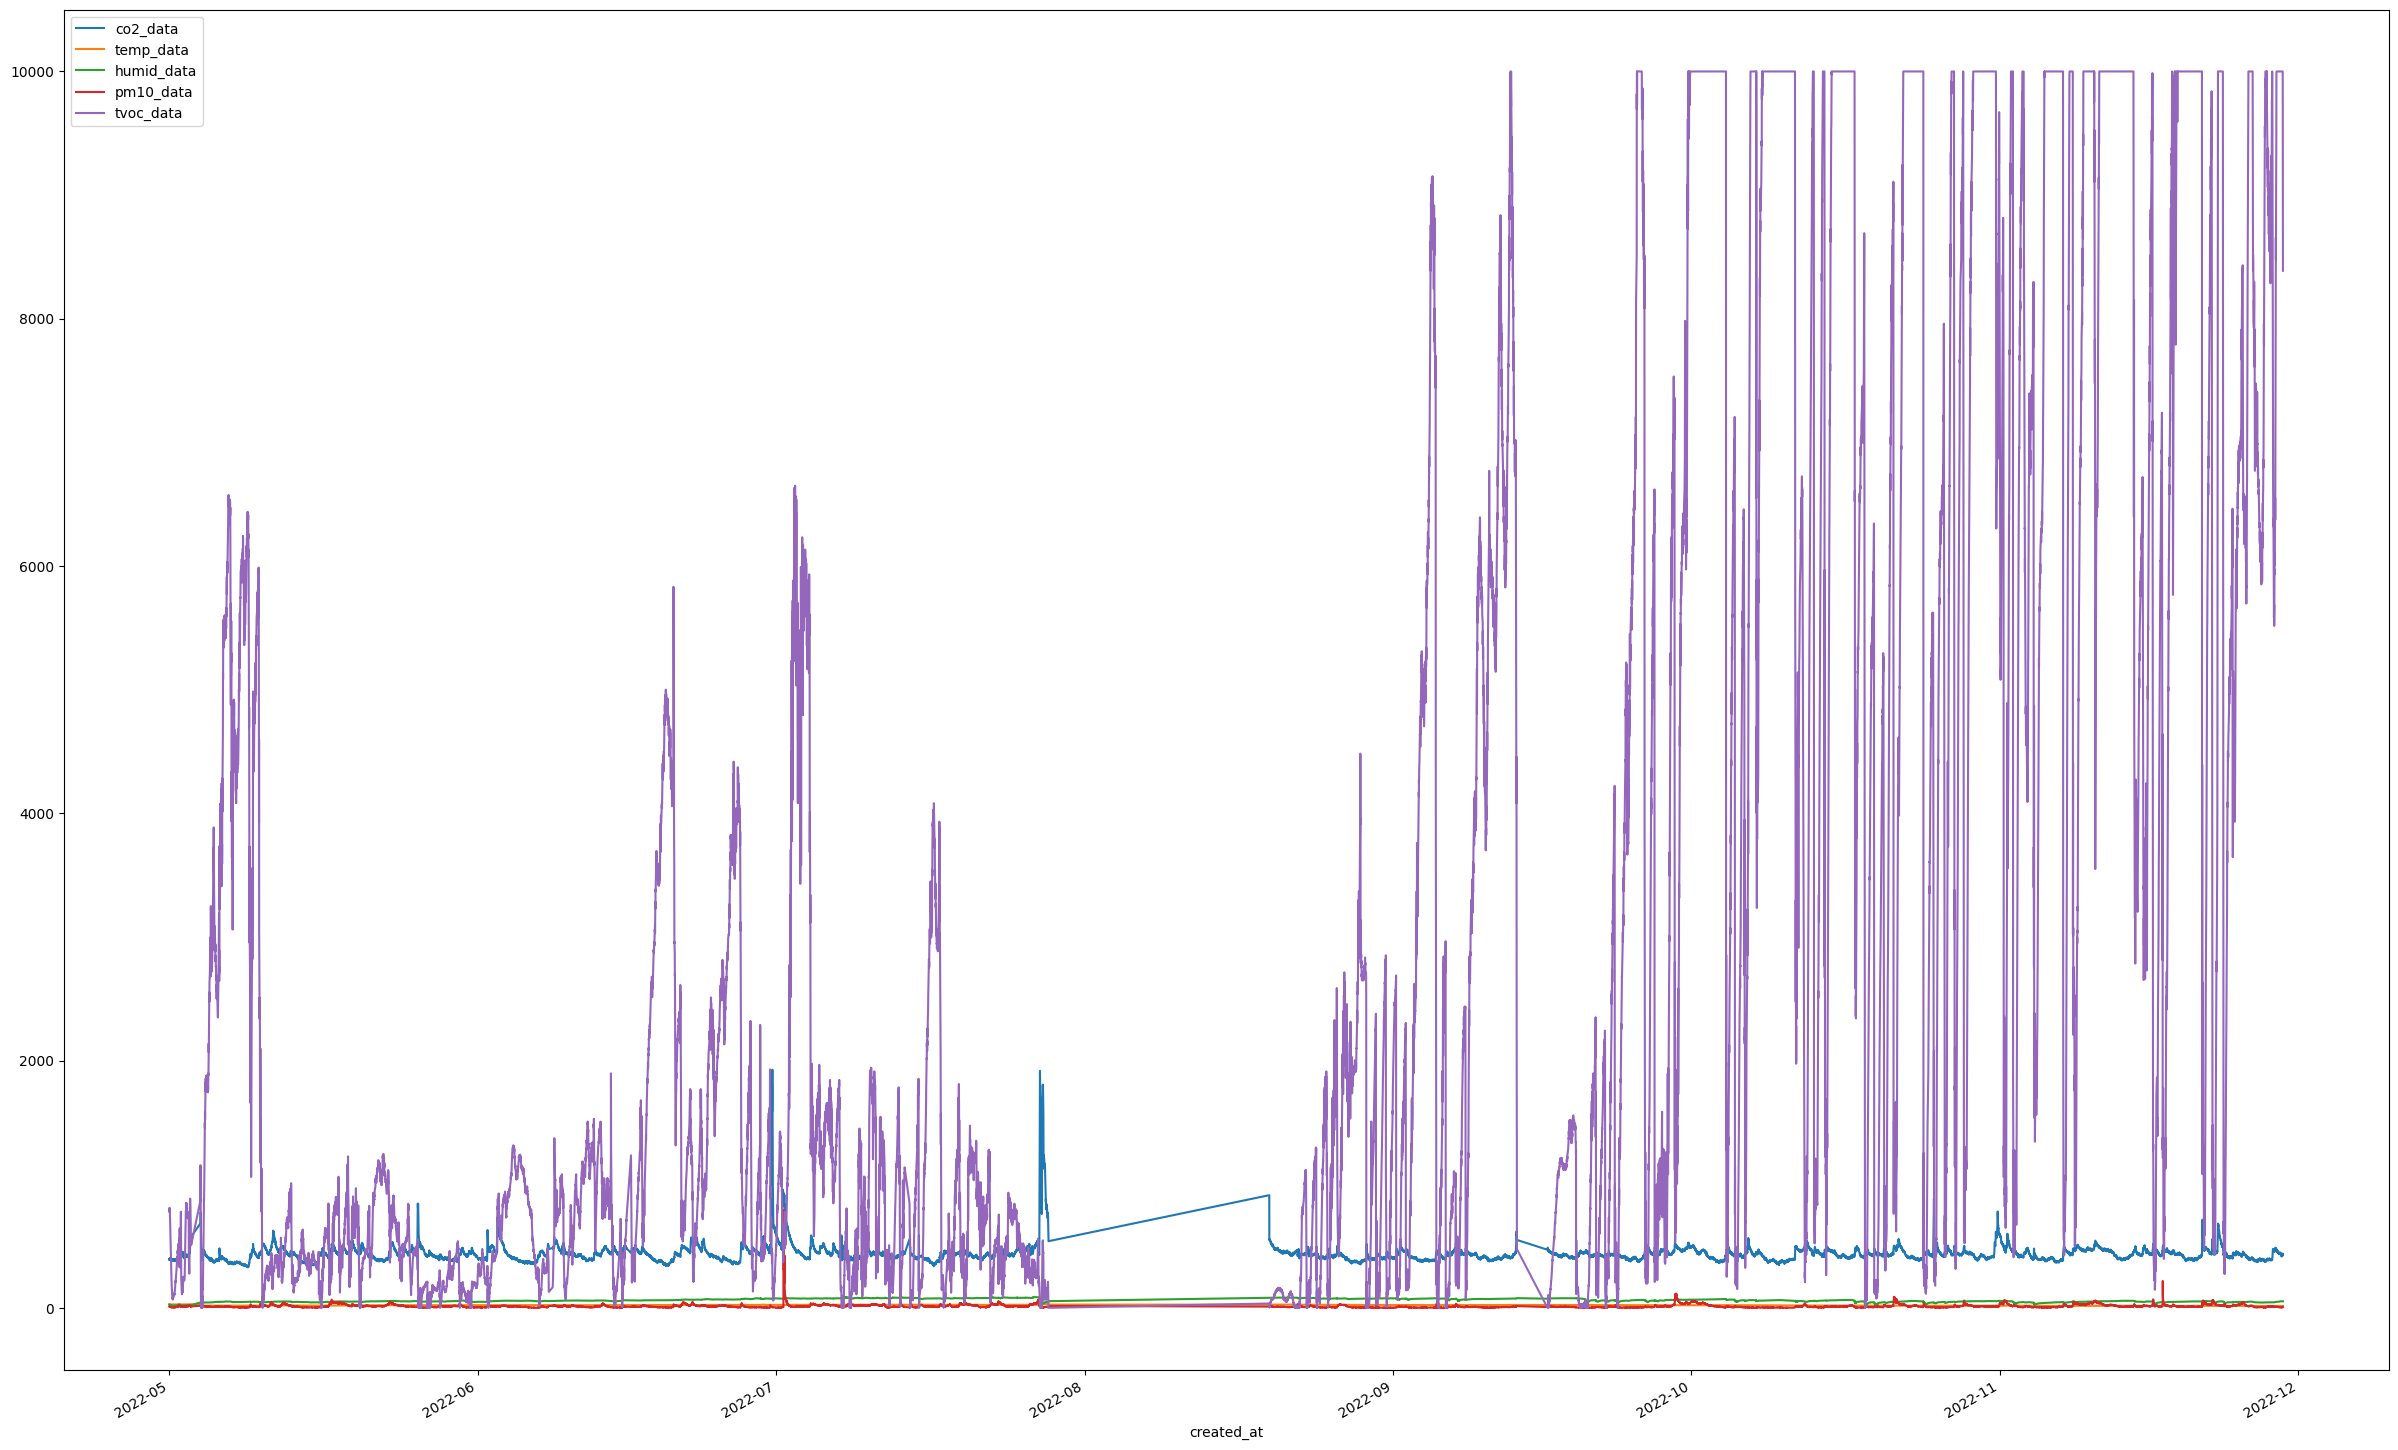

In [42]:
hr_sensor_data.plot(x = "created_at", figsize=(30,20))

In [81]:
hr_sensor_data_filtered = hr_sensor_data[hr_sensor_data['created_at'].between('2022-11-25', '2022-11-30')]
print(len(hr_sensor_data_filtered))
hr_sensor_data_filtered

517


,created_at,co2_data,temp_data,humid_data,pm10_data,tvoc_data
21378,2022-11-25 00:05:38,428.0,15.5,48.0,28.0,6819.0
21379,2022-11-25 00:15:38,434.0,15.6,47.9,28.0,6935.0
21380,2022-11-25 00:25:38,440.0,15.5,48.0,27.0,6884.0
21381,2022-11-25 00:35:38,435.0,15.5,48.0,25.0,6834.0
21382,2022-11-25 00:45:38,435.0,15.5,47.9,26.0,6935.0
...,...,...,...,...,...,...
21890,2022-11-29 10:16:30,434.0,15.2,53.0,4.0,9999.0
21891,2022-11-29 10:26:30,437.0,15.1,53.1,4.0,9999.0
21892,2022-11-29 10:36:30,436.0,15.1,53.0,4.0,9636.0
21893,2022-11-29 10:46:30,438.0,15.1,52.8,5.0,8466.0


<AxesSubplot:xlabel='created_at'>

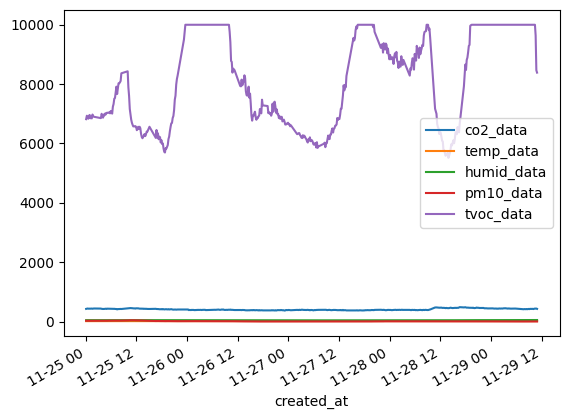

In [82]:
hr_sensor_data_filtered.plot(x = "created_at")

In [83]:
hr_sensor_data_filtered['created_at'] = pd.DatetimeIndex(hr_sensor_data_filtered['created_at']) + timedelta(days=6)
hr_sensor_data_filtered.to_csv("hr_sensor_data.csv", index=False)
hr_sensor_data_filtered

/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,created_at,co2_data,temp_data,humid_data,pm10_data,tvoc_data
21378,2022-12-01 00:05:38,428.0,15.5,48.0,28.0,6819.0
21379,2022-12-01 00:15:38,434.0,15.6,47.9,28.0,6935.0
21380,2022-12-01 00:25:38,440.0,15.5,48.0,27.0,6884.0
21381,2022-12-01 00:35:38,435.0,15.5,48.0,25.0,6834.0
21382,2022-12-01 00:45:38,435.0,15.5,47.9,26.0,6935.0
...,...,...,...,...,...,...
21890,2022-12-05 10:16:30,434.0,15.2,53.0,4.0,9999.0
21891,2022-12-05 10:26:30,437.0,15.1,53.1,4.0,9999.0
21892,2022-12-05 10:36:30,436.0,15.1,53.0,4.0,9636.0
21893,2022-12-05 10:46:30,438.0,15.1,52.8,5.0,8466.0


In [84]:
hr_sensor_data_filtered = hr_sensor_data[hr_sensor_data['created_at'].between('2022-11-27', '2022-11-28')]
hr_sensor_data_filtered['created_at'] = pd.DatetimeIndex(hr_sensor_data_filtered['created_at']) + timedelta(days=3)
hr_sensor_data_filtered.to_csv("hr_sensor_data_nov.csv", index=False)
hr_sensor_data_filtered

/Users/seohyun/Desktop/KHU/capstone2/code/python-data-control/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,co2_data,temp_data,humid_data,pm10_data,tvoc_data
21609,2022-11-30 00:06:04,392.0,15.2,43.8,6.0,6644.0
21610,2022-11-30 00:16:04,389.0,15.2,43.8,6.0,6649.0
21611,2022-11-30 00:26:04,386.0,15.2,43.7,6.0,6579.0
21612,2022-11-30 00:36:04,382.0,15.2,43.7,6.0,6614.0
21613,2022-11-30 02:06:03,394.0,15.1,43.3,6.0,6313.0
...,...,...,...,...,...,...
21715,2022-11-30 23:16:35,387.0,14.9,43.7,11.0,9321.0
21716,2022-11-30 23:26:35,391.0,14.9,43.7,10.0,9040.0
21717,2022-11-30 23:36:35,394.0,14.9,43.7,11.0,9197.0
21718,2022-11-30 23:46:35,392.0,14.9,43.7,11.0,8995.0
